
Cluster 0:
  x: min=0.0, max=19.0, mean=9.324590163934426
  y: min=0.0, max=25.0, mean=10.262295081967213
  z: min=0.0, max=24.0, mean=10.809836065573771
Count:305

Cluster 1:
  x: min=16.0, max=37.0, mean=29.037037037037038
  y: min=26.0, max=39.0, mean=31.11111111111111
  z: min=17.0, max=41.0, mean=30.925925925925927
Count:27


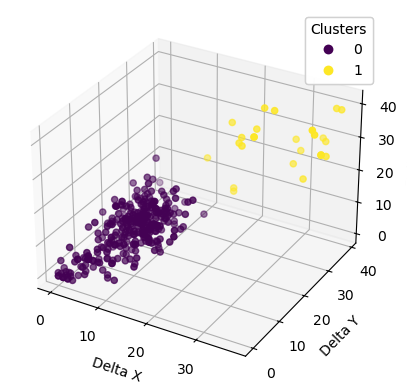

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


df = pd.read_csv('3D_Masks_Data_parietal.csv')

# K-Means clustering
kmeans = KMeans(n_clusters=2)  # You can choose the number of clusters
df['cluster'] = kmeans.fit_predict(df[['Delta X', 'Delta Y', 'Delta Z']])

# 3D Scatter Plot with Clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Delta X'], df['Delta Y'], df['Delta Z'], c=df['cluster'], cmap='viridis')
# Adding labels
ax.set_xlabel('Delta X')
ax.set_ylabel('Delta Y')
ax.set_zlabel('Delta Z')

# Adding a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Group by cluster and calculate min, max, and mean for each column
cluster_stats = df.groupby('cluster').agg({
    'Delta X': ['min', 'max', 'mean'],
    'Delta Y': ['min', 'max', 'mean'],
    'Delta Z': ['min', 'max', 'mean']
})

# Renaming columns for better readability
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]
cluster_stats.reset_index(inplace=True)

toggle = True
# Print the results in a more readable format
for _, stats in cluster_stats.iterrows():
    cluster_label = int(stats['cluster'])
    print(f"\nCluster {cluster_label}:")
    print(f"  x: min={stats['Delta X_min']}, max={stats['Delta X_max']}, mean={stats['Delta X_mean']}")
    print(f"  y: min={stats['Delta Y_min']}, max={stats['Delta Y_max']}, mean={stats['Delta Y_mean']}")
    print(f"  z: min={stats['Delta Z_min']}, max={stats['Delta Z_max']}, mean={stats['Delta Z_mean']}")
    if toggle:
        print(f"Count:{df[df['cluster']==0]['cluster'].count()}")
        toggle = False
    else:
        print(f"Count:{df[df['cluster']==1]['cluster'].count()}")
    





In [32]:
df.shape

(332, 10)

In [33]:

filtered_df = df[df['Number of Voxels'] > 22]

filtered_df.shape


(301, 10)

In [34]:


cluster1 = filtered_df[filtered_df['cluster']==1]
cluster2 = filtered_df[filtered_df['cluster']==0]



cluster1 = cluster1.sort_values(by='Number of Voxels', ascending=False)

cluster2 = cluster2.sort_values(by='Number of Voxels', ascending=False)



In [41]:
cluster1.shape

(27, 10)

In [42]:

cluster2.to_csv('Small_Masks.csv', index=False)

cluster1.to_csv('Large_Masks.csv', index = False)